# Komplekse tal i SymPy

I LinALys lærer du at regne med komplekse tal. SymPy kan være en hjælp f.eks. til at visualisere alle løsninger til komplekse ligninger, men er i kurset primært et værktøj som du kan bruge til at checke de beregninger, der indgår i pointopgaverne og den afsluttende eksamen. Især hvis du har erfaring med at du laver mange regnefejl i omfattende beregninger, kan det være godt at checke beregningerne trin for trin i SymPy.

Vi starter med at importere den imaginære enhed ved hjælp af <code>from sympy import I</code>, $I$ er SymPys standardsyntaks for det imaginære tal $i$.

In [1]:
import sympy as sp
from sympy import I, pi

## Almindelige regneoperationer med komplekse tal

Når vi benytter <code>I</code>, får vi automatisk et komplekst tal, og SymPy behandler det som sådan ganske automatisk. Vi kan altså skrive $z = 3 + 4i$ som <code>z = 3 + 4 * I</code>:

In [2]:
z = 3 + 4 * I
z

3 + 4*I

Eller vi kan lave et mere generelt udtryk, hvor vi istedet benytter symboler:

In [3]:
from sympy.abc import a, b
w = a + b * I
w

a + I*b

Når vi først har defineret vores udtryk, så kan vi regne med dem på samme måde som med alle andre (reelle) tal. Regneoperationerne <code>+</code>, <code>-</code>, <code>*</code> og <code>/</code> fungerer som de skal.

In [4]:
z = 1 + 2 * I
w = - 3 * I
z + w

1 - I

In [5]:
z - w

1 + 5*I

In [6]:
z * w

-3*I*(1 + 2*I)

Ved multiplikation og division er det nogle gange en god idé at bede SymPy om at reducere udtrykket. Især, hvis man gerne vil have det på en $x + yi$ form:

In [7]:
sp.simplify(z * w)

6 - 3*I

In [8]:
display(z / w,
        sp.simplify(z / w))

I*(1 + 2*I)/3

-2/3 + I/3

Man kan desuden beregne potenser af et kompleks tal på sædvandligvis ved at bruge <code>**</code>:

In [9]:
z ** 3

(1 + 2*I)**3

I dette tilfælde er der ikke meget hjælp at hente i <code>simplify</code>:

In [10]:
sp.simplify(z ** 3)

(1 + 2*I)**3

Vi kan til gengæld bede SymPy om at gange parentesen ud med <code>sp.expand</code>:

In [11]:
sp.expand(z ** 3)

-11 - 2*I

SymPy ved, hvordan den skal håndtere komplekse tal i mange sammenhænge, hvor fortolkningen er entydig. Man altså blot bruge komplekse tal i <code>sp.exp()</code>, <code>sp.cos()</code> eller lignende.

## Notationsformer og skift mellem disse

Når vi arbejder med komplekse tal, benytter vi enten kartetiske koordinater eller modulus/argument. I SymPy er der en del metoder, til at konverterer den ene til den anden, som vi vil gennemgå i dette afsnit. 

### Kartesiske koordinater, real og imaginærdel.

Funktionerne `sp.re()` og `sp.im()` giver real- og imaginærdelen af et komplekst tal. Det er naturligvis trivielt hvis vi starter med et imaginært tal af formen $x + iy$:

In [12]:
z = 10 - 7 * I
display(z,
        sp.re(z),
        sp.im(z))

10 - 7*I

10

-7

Men det er mere oplysende, hvis vores komplekse tal har en anden form, for eksempel $4 e^{i \pi / 3}$:

In [13]:
w = 4 * sp.exp(I * pi / 3)
display(w,
        sp.re(w),
        sp.im(w))

4*exp(I*pi/3)

2

2*sqrt(3)

### Modulus og argument

Vi kan desuden nemt beregne modulus og argument. Modulus for et komplekst tal er det samme som tallets absolutte værdi (TL s. 126) og findes med <code>sp.Abs()</code>. Bemærk at man bruger et stort A for at adskille kommandoen fra Pythons abs-funktion. For symbolske udtryk vil SymPy dog automatisk bruge sp.Abs() selv hvis vi bruger et lille a. Så for de to tal defineret ovenfor får vi:

In [14]:
display(sp.Abs(z),
        sp.Abs(w))

sqrt(149)

4

Argumentet findes ved <code>sp.arg()</code> :

In [15]:
display(sp.arg(z),
        sp.arg(w))

-atan(7/10)

pi/3

Hvorefter vi som nævnt tidligere kan bruge <code>.evalf()</code>, hvis vi vil have et bud på værdien af $-\arctan (7/10)$ med fire decimaler

In [16]:
sp.arg(z).evalf(4)

-0.6107

### Kompleks konjugering

Vi vil ret ofte benytte os af kompleks konjugering, hvor vi skifter fortegn på imaginærdelen (eller spejler i den reelle akse). Dette kan vi gøre ved brug af <code>sp.conjugate()</code>, som virker på imaginære tal uanset notationsform. Bemærk at funktionen hedder det samme som den tilsvarende funktion for matricer, som vi kender fra Lineær Algebra, men som har en anden syntax:

In [17]:
display(z,
        sp.conjugate(z),  # Konjugering af komplekst tal
        z.conjugate())    # Konjugering af matrix ... men da z kan opfattes som en 1 x 1 matrix, er resultatet det samme

10 - 7*I

10 + 7*I

10 + 7*I

In [18]:
display(w,
        sp.conjugate(w))

4*exp(I*pi/3)

4*exp(-I*pi/3)

## Rødder og ligninger

En central egenskab ved de komplekse tal er, at et polynomium af n'te grad altid har netop n rødder (med multiplicitet). Vi skal ofte finde rødder i polynomier og løsninger til ligninger, og her indgår der ofte kvadratrødder og andre rødder af komplekse tal. Se TK 3.4.2 s. 141, hvor det fremgår at der altid er netop $n$ n'te rødder. Når vi vil finde den n'te rod af et komplekst tal, benytter vi <code>sp.root</code>. Syntaksen er således, at $\sqrt[n]{z}$ skrives som 
```python
sp.root(z, n, hvilken_rod)
```
hvor <code>hvilken_rod</code> er et tal mellem $0$ til $n-1$ (husk at Python tæller fra 0) og fortæller 
SymPy, hvilken af de $n$ rødder, den skal udregne.

In [19]:
z = - 3 + 3 * I
display(z)

-3 + 3*I

In [20]:
sp.root(z, 4, 0)

(-3 + 3*I)**(1/4)

Dette er utvivlsomt korrekt, men når man ønsker et mere anvendeligt svar, kan man f.eks. tvinge SymPy til at udregne real-delen og imaginærdelen som vi gjorde ovenfor:

In [21]:
r1 = sp.root(z, 4, 0)
display(sp.re(r1))
display(sp.im(r1))

2**(1/8)*3**(1/4)*cos(3*pi/16)

2**(1/8)*3**(1/4)*sin(3*pi/16)

Vi vil nu se på rødderne i et simplere tilfælde, nemlig $\sqrt[4]{-4}$.

Hvis vi ønsker at finde alle rødderne på en gang og få dem præsenteret i en liste, kan vi enten skrive det op som en ligning:

In [22]:
from sympy.abc import x
display(*sp.solve(sp.Eq(x**4, -4), x))

-1 - I

-1 + I

1 - I

1 + I

Eller vi kan beregne rødderne en efter en ved hjælp af en for-løkke:

In [23]:
for i in range(4):
    r = sp.root(-4, 4, i)
    display(sp.re(r) + I * sp.im(r))

1 + I

-1 + I

-1 - I

1 - I

Vi kan finde rødder til polynomier ved hjælp af <code>sp.solve()</code>. Vi minder om at hvis vi kun giver <code>sp.solve()</code> et udtryk (og altså ikke en ligning, f.eks. dannet ved hjælp af <code>sp.Eq</code>), så finder funktionen løsninger til den ligning, der fremkommer når udtrykket sættes lig 0:

In [24]:
from sympy.abc import z 
# Definer p som også har imaginære rødder
p =  z ** 3 - z ** 2 + 4 * z + -4

# Løs med sp.solve ved hjælp af udtrykket for p, der automatisk sættes lig nul
display(*sp.solve(p))

1

-2*I

2*I

In [25]:
#... eller med en mindre elegant syntaks, hvor ligningen eksplicit er angivet til z3 - z^2 + 4z = 4
display(*sp.solve(sp.Eq(z**3 - z**2 + 4 * z, 4), z))

1

-2*I

2*I

## Visualisering i det komplekse plan

Der er ikke et decideret tegneværktøj til komplekse tal i SymPy. Vi tager derfor de to værktøj, som I har set i MekRel frem. _NumPy_ og _Matplotlib_, da dette langt hen af vejen vil give de mest elegante løsninger. Når vi gør dette vil vi fra numpy importerer `array`, og så vil vi bruge `plot` fra Matplotlib. Se eventuelt [noterne fra Python i Mekrel](../MekRel/Intro_til_MekRel.ipynb).

Når vi først har en liste af komplekse tal i SymPy, kan vi benytte `array` sammen med nøgleordet `dtype = complex` til at danne et numerisk og komplekst numpy array. 

Når vi først har en liste, kan vi nu lave lister over real-delene og de komplekse dele med hhv. `.real` og `.imag`, og så bruge `plot` fra matplotlib til at vise dette.

Vi laver her et eksempel, hvor vi vil visualiserer et komplekst tal opløftet i en stigende potens.

In [26]:
# Vi tager et eksempel med (1 + i/2)^n for n = 0, ..., 11
z = 1 + I/2

# Tom liste
zs = []
for n in range(12): # Vi kører nu igennem tolv gange (altså fra 0 til 11) og tilføjer potensen til en liste
    zs.append(sp.expand(z ** n))
    
display(zs)

[1,
 1 + I/2,
 3/4 + I,
 1/4 + 11*I/8,
 -7/16 + 3*I/2,
 -19/16 + 41*I/32,
 -117/64 + 11*I/16,
 -139/64 - 29*I/128,
 -527/256 - 21*I/16,
 -359/256 - 1199*I/512,
 -237/1024 - 779*I/256,
 1321/1024 - 6469*I/2048]

Vi kan nu lave `zs` til et numerisk array ved brug af numpy:

In [27]:
from numpy import array
z_numerisk = array(zs, dtype = complex)

Nu kan vi plotte `z_numerisk.real` af x-aksen og `z_numerisk.imag` af y-aksen. Vi importerer _Matplotlib_ til dette formål og kalder `plt.plot`. Vi fortæller desuden at vi vil have "x" som markeringer og have en rød farve.

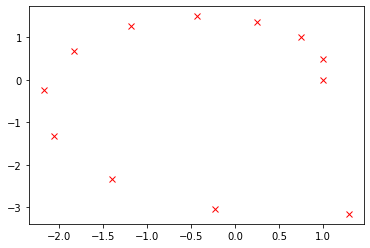

In [28]:
import matplotlib.pyplot as plt

plt.plot(z_numerisk.real, z_numerisk.imag, "x", color = "red")


Ønsker man at lave plottet med viste akser kan man gøre følgende, som rykker den venstre og nederste akse i midten og skjuler de to andre:

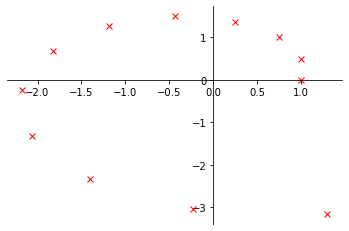

In [29]:
# Samme plot som overstående
plt.plot(z_numerisk.real, z_numerisk.imag, "x", color = "red")

# Ryk venstre akse til midten
plt.gca().spines['left'].set_position("zero") 

# Skjul den højre
plt.gca().spines['right'].set_color(None)

# Gentag for nederste og toppen
plt.gca().spines['bottom'].set_position("zero")
plt.gca().spines['top'].set_color(None)